<a href="https://colab.research.google.com/github/parduet/CDA-340-notes/blob/main/Copy_of_Intro_to_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to logistic regression

## Review: linear regression

Multiple Linear Regression Formula
$𝑌 = \beta_0+\beta_1 x_1+\beta_2 x_2+...+\beta_n x_n+ \epsilon$

Where: \

&nbsp; &nbsp; &nbsp; &nbsp; Y = Dependent variable (continuous)

&nbsp; &nbsp; &nbsp; &nbsp; $x_1$, $x_2$, ..., $x_n$ are Independent variables \
&nbsp; &nbsp; &nbsp; &nbsp; ε = Error term (actual -predicted values)

Multiple linear regression is used when the dependent variable is continuous.

Intercept: -99643.28413408092
Coefficients: [  257.94373776 -9011.69290611  2179.13948831]


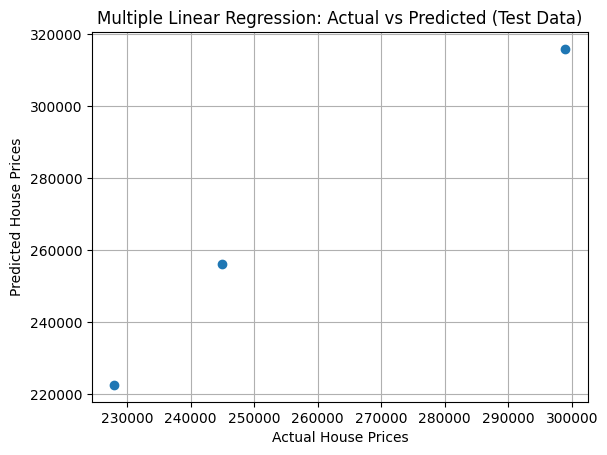

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Sample dataset (house features)
data = {
    "square_feet": [1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700, 1550, 1210, 1125, 1470, 1110],
    "bedrooms": [3, 4, 3, 4, 2, 3, 5, 4, 3, 4, 4, 3, 2, 3, 2],
    "house_age": [10, 15, 7, 5, 20, 12, 4, 3, 9, 6, 25, 17, 10, 12, 4],
    "price": [245000, 312000, 279000, 308000, 199000, 280000, 489000, 525000, 250000, 299000, 325000, 228000, 185000, 340000, 215000]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Define independent variables (X) and dependent variable (Y)
X = df[["square_feet", "bedrooms", "house_age"]]
y = df["price"]

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred = lr_model.predict(X_test)

# Model Results
print("Intercept:", lr_model.intercept_)
print("Coefficients:", lr_model.coef_)


# Visualizing predictions vs actual
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Multiple Linear Regression: Actual vs Predicted (Test Data)")
plt.grid()
plt.show()


## If DV is binary, use logistic regression

Instead of directly modeling the 0/1 binary, we want to model the probability. Because probability has a limited domain [0,1], use the log-odds as our DV.


### Odds

Odds represent the ratio of the probability of success (P) to the probability of failure (1-P):

$Odds = \frac{P}{1-P}$

Example: If P(win) = 0.75, then odds of winning are

$\frac{.75}{1-.75}=3$

### Log-odds

Log-odds, or the logit function, is $ln(\frac{P}{1-P})$. Log-odds has domain $(-\infty, \infty)$.

The logistic regression model:

$ln(\frac{P}{1-P}) = \beta_0+\beta_1 x_1+\beta_2 x_2+...+\beta_n x_n+ \epsilon$

To find predicted probabilities, solve for P:\
$P=\frac{1}{1+e^{\beta_0+\beta_1 x_1+\beta_2 x_2+...+\beta_n x_n}}$




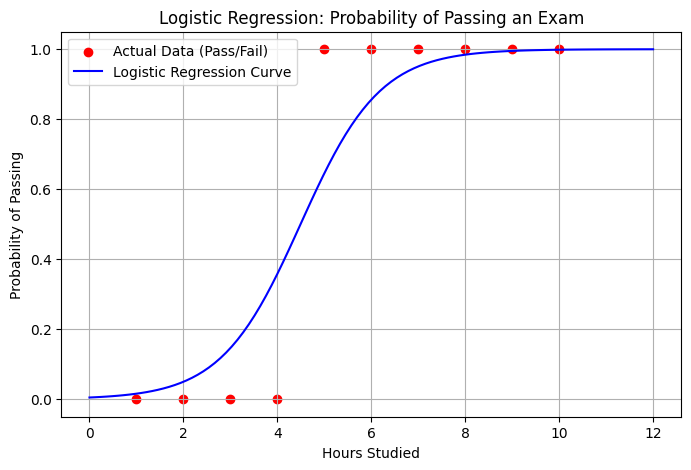

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Example: Hours Studied vs. Probability of Passing
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Hours studied
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])  # 0 = Fail, 1 = Pass

# Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Generate values for prediction
X_range = np.linspace(0, 12, 100).reshape(-1, 1)
y_prob = log_reg.predict_proba(X_range)[:, 1]  # Get probability of passing

# Plot the logistic regression curve
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="red", label="Actual Data (Pass/Fail)")
plt.plot(X_range, y_prob, color="blue", label="Logistic Regression Curve")
plt.xlabel("Hours Studied")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression: Probability of Passing an Exam")
plt.legend()
plt.grid()
plt.show()


## Logistic regression vs KNN

Both use numerical variables to predict a categorical variable, so why choose one vs. the other?

Use logistic regression when:
* Interpretability is important – Logistic regression provides meaningful coefficients, so you can explain how each predictor affects the probability.
* The dataset is large – Logistic regression is computationally efficient even with millions of records
* You need probabilities – Logistic regression predicts probabilities rather than just class labels, which can be useful in decision-making

Use KNN when: \
* The dataset is small to medium-sized – Since KNN uses distances which are computationally intensive, it's best for datasets with a few thousand points.
* You need a flexible model – KNN can adapt to complex patterns as long as you choose an appropriate value of
k.
* You don't need explicit model interpretation – KNN is a black-box method where predictions are based on distances rather than feature coefficients.
* The dataset is not very high-dimensional – KNN performs poorly when you have many features unless you use PCA for dimensionality reduction.